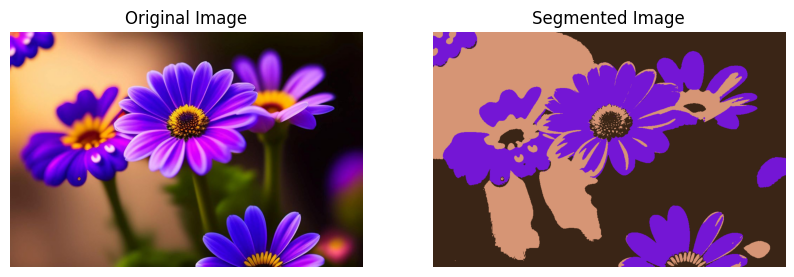

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/flower.jpg')  # Replace 'image.jpg' with your image path
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for visualization

# Reshape the image into a 2D array of pixels (each pixel is a row)
pixels = image_rgb.reshape((-1, 3))

# Convert to floating point for KMeans
pixels = np.float32(pixels)

# Define criteria for KMeans (10 iterations or epsilon 0.2)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# Number of clusters (you can change this depending on the image and desired segmentation)
k = 3

# Apply KMeans clustering
_, labels, centers = cv2.kmeans(pixels, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert centers to 8 bit values
centers = np.uint8(centers)

# Map the labels to the corresponding cluster centers
segmented_image = centers[labels.flatten()]

# Reshape back to the original image shape
segmented_image = segmented_image.reshape(image_rgb.shape)

# Display the original and segmented images
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image_rgb)
plt.axis('off')

# Segmented image
plt.subplot(1, 2, 2)
plt.title('Segmented Image')
plt.imshow(segmented_image)
plt.axis('off')

plt.show()
